# Final project of the course Machine Learning with Python 2021

_authors: Maria Cristina Hinojosa Lee, Maarten Velghe, Daniel Borek_

The goal of this project is to screen applications of Russian potential clients to a Hotel in Bahamas. The reason is that Russian clients represent a contrasting customer segment. On one hand, they spend a high quantity of money during their stay in the hotel. On the other hand, they also cause a high cost on damages that is not recoverable for the Hotel. 
 
### Problem definition 
 
For this work the objective is to build a model that will predict expected value for each possible client given the information about them and allow for optimal selection of applications based on their score. In our case  we need  to select best  200 applications list of 500 potential customers. The client list should represent a balance between damage and profit.  
 
To be able to achieve this, different algorithms were used. To train them, a second data set was utilized that contained information over former guests. This data set included variables such as profit, damage (from visits that excluded the last one), age , gender, among others. In the next sections more details will be discussed over the different parts of the work. N
 
The work could be done in severals ways. The one of them  would be separately  scoring and predicting the projected revenue per clients, predict which clients will cause damage, predict the damage that those clients would cause, and to  to combine them to create a measure of the expected value for each potential customer so that client list can be selected.

## Exploratory Data Analysis

### Import libraries


In [1]:

import numpy as np
import pandas as pd
from matplotlib import animation as ani, pyplot as plt
import seaborn as sns #pretty graphics R style

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import HTML
plt.style.use('seaborn-darkgrid')
import matplotlib as mpl 
import matplotlib.pyplot as plt #graphics

from sklearn.inspection import permutation_importance
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler #library for the rescaling
import statsmodels.api as sm 
import statsmodels.formula.api as smf
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# from treeinterpreter import treeinterpreter as ti, utils


### Checking the dataset
Now, lets show the data set columns as it is, with their columns.

In [2]:
data_train_raw = pd.read_csv('https://raw.githubusercontent.com/phuycke/ML-in-Python/main/data/raw/train_V2.csv')
data_train_raw

,income_am,profit_last_am,profit_am,damage_am,damage_inc,crd_lim_rec,credit_use_ic,gluten_ic,lactose_ic,insurance_ic,...,score2_neg,score3_pos,score3_neg,score4_pos,score4_neg,score5_pos,score5_neg,outcome_profit,outcome_damage_inc,outcome_damage_amount
0,227.0,0.0,3201.0,888.0,6.0,15000.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,0.838147,0.082288,NaN,NaN,1791.66,0,0.00
1,268.0,16.0,1682.0,0.0,0.0,750.0,0.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,7.955259,1672.78,1,829.66
2,283.0,23.0,1673.0,0.0,0.0,750.0,0.0,0.0,0.0,1.0,...,0.099529,NaN,NaN,NaN,NaN,0.101955,1.743020,1001.40,0,0.00
3,227.0,0.0,1685.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0.889793,NaN,NaN,NaN,NaN,1785.59,0,0.00
4,4091.0,1028.0,3425.0,785.0,2.0,14000.0,0.0,0.0,1.0,0.0,...,NaN,0.330503,0.766294,0.490486,0.542445,NaN,NaN,3140.74,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,584.0,52.0,1769.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.745643,0.295942,0.830932,0.071366,0.313204,3.739346,2172.82,0,0.00
4996,227.0,0.0,1620.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1057.83,0,0.00
4997,239.0,5.0,2068.0,0.0,0.0,2500.0,0.0,0.0,0.0,1.0,...,0.049782,NaN,NaN,0.544873,0.331139,NaN,NaN,188.77,0,0.00
4998,1068.0,104.0,6405.0,490.0,2.0,15000.0,0.0,0.0,0.0,1.0,...,NaN,NaN,NaN,0.580246,0.388815,NaN,NaN,1863.41,0,0.00


In the next part, Describe() will be used. This allows to see some statistical details from each column in pandas (pandas is a tool for the manipulation of data).  This includes the mean, the standard deviation, quartiles, min, max.

In [3]:
data_train_raw.describe()

,income_am,profit_last_am,profit_am,damage_am,damage_inc,crd_lim_rec,credit_use_ic,gluten_ic,lactose_ic,insurance_ic,...,score2_neg,score3_pos,score3_neg,score4_pos,score4_neg,score5_pos,score5_neg,outcome_profit,outcome_damage_inc,outcome_damage_amount
count,4947.000000,4947.000000,4947.000000,4954.000000,4947.000000,4947.000000,4947.000000,4947.000000,4947.000000,4947.000000,...,1.304000e+03,1.261000e+03,1.367000e+03,1.223000e+03,1.324000e+03,1.232000e+03,1493.000000,5000.000000,5000.000000,5000.000000
mean,2281.260158,696.057712,3637.900950,145.952967,0.352335,3298.716394,0.041237,0.024661,0.094199,0.390944,...,4.967340e-01,4.942801e-01,4.985876e-01,4.962065e-01,5.013962e-01,5.009593e-01,5.192953,1967.310930,0.255400,189.970736
std,8365.254507,3051.119275,5726.625669,581.068095,0.889449,4549.646039,0.198858,0.155107,0.292134,0.488011,...,2.897994e-01,2.899165e-01,2.877292e-01,2.886538e-01,2.876226e-01,2.901323e-01,3.159868,1371.061266,0.436129,379.005941
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,-7.871775,10.680000,0.000000,0.000000
25%,229.000000,0.000000,1638.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.454209e-01,2.405574e-01,2.495061e-01,2.474100e-01,2.506703e-01,2.514905e-01,3.124958,1333.320000,0.000000,0.000000
50%,469.000000,52.000000,1889.000000,0.000000,0.000000,1500.000000,0.000000,0.000000,0.000000,0.000000,...,4.985832e-01,4.942465e-01,5.016458e-01,4.933486e-01,5.020603e-01,5.029121e-01,5.188006,1721.235000,0.000000,0.000000
75%,1688.000000,810.000000,3165.500000,0.000000,0.000000,5000.000000,0.000000,0.000000,0.000000,1.000000,...,7.474935e-01,7.449235e-01,7.464826e-01,7.452133e-01,7.493876e-01,7.512817e-01,7.357425,2223.712500,1.000000,202.612500
max,360577.000000,150537.000000,100577.000000,14866.000000,10.000000,30000.000000,1.000000,1.000000,1.000000,1.000000,...,9.986510e-01,9.999999e-01,9.999999e-01,9.999999e-01,9.993125e-01,9.999999e-01,14.776319,31529.000000,1.000000,3157.240000


### Checking NaNs in training set

We will look if there any really bad records there, We may look into how many missing  missing values are there for rows (observations) and for columns (features). We decided to not to drop features, only specific observation with many Nans

In [4]:
def fast_check_data(df_temp, ax = 1, treshold = 40):
  total = df_temp.isnull().sum(axis = ax)
  percent = (df_temp.isnull().sum(axis = ax)/df_temp.shape[ax])*100
  missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
  if ax == 1:
    mask = missing_data["Percent"]>treshold 
    data_nan = df_temp[missing_data["Percent"]>treshold ]
  if ax == 0:
    mask = _
    data_nan = _ 
  missing_data = missing_data[missing_data["Percent"]>treshold ].sort_values(by=['Percent'], ascending = False).round(1)
  return mask, data_nan, missing_data if ax == 1  else missing_data




The next part was done just to see what happened if we deleted the missing values. It was left just for information but it was decided to not just drop missing values.

In [6]:
# Put here treshold for 40% nan in the rows, most of the rows above are around 80% anyway

mask, data_nan, missing_data = fast_check_data(data_train_raw,  ax = 1, treshold = 40)
print(missing_data)
data_nan



      Total  Percent
3068     48     90.6
3377     48     90.6
2672     48     90.6
2348     48     90.6
4641     48     90.6
996      48     90.6
4545     48     90.6
306      48     90.6
1744     48     90.6
4000     47     88.7
3793     47     88.7
3952     47     88.7
3959     47     88.7
3990     47     88.7
4159     47     88.7
4138     47     88.7
4242     47     88.7
4392     47     88.7
4477     47     88.7
4614     47     88.7
4789     47     88.7
4851     47     88.7
4946     47     88.7
3213     47     88.7
90       47     88.7
1448     47     88.7
1852     47     88.7
474      47     88.7
517      47     88.7
670      47     88.7
790      47     88.7
1062     47     88.7
1261     47     88.7
1275     47     88.7
2917     47     88.7
1696     47     88.7
4993     47     88.7
2058     47     88.7
2096     47     88.7
2250     47     88.7
2696     47     88.7
2734     47     88.7
4009     46     86.8
1338     46     86.8
1281     46     86.8
3926     46     86.8
4528     46  

,income_am,profit_last_am,profit_am,damage_am,damage_inc,crd_lim_rec,credit_use_ic,gluten_ic,lactose_ic,insurance_ic,...,score2_neg,score3_pos,score3_neg,score4_pos,score4_neg,score5_pos,score5_neg,outcome_profit,outcome_damage_inc,outcome_damage_amount
90,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1665.23,0,0.00
306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2904.56,1,721.46
474,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2543.67,0,0.00
517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3267.54,0,0.00
670,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2350.49,0,0.00
790,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2269.53,0,0.00
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2770.55,1,1076.23
1062,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2498.46,0,0.00
1164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2784.45,0,0.00
1261,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3963.54,0,0.00


There positions that almost  completely Nan. So we was decided that a good approach would be to remove them, as from our point of view it does not make sense to do an imputation.
We are removing the Nans rows, but  we will leave the collumn with nans

In [7]:
data_train= data_train_raw[~mask].reset_index(drop=True)

In [8]:
_, _ ,columns_nan = fast_check_data(data_train_raw,  ax = 0, treshold = 40)
columns_nan

,Total,Percent
score2_pos,3791,75.8
score4_pos,3777,75.5
score1_pos,3775,75.5
score5_pos,3768,75.4
score3_pos,3739,74.8
score2_neg,3696,73.9
score1_neg,3686,73.7
score4_neg,3676,73.5
score3_neg,3633,72.7
score5_neg,3507,70.1


### Checking NaNs in test set

 We will do the same procedure for our _score_ dataset

In [9]:
score_raw = pd.read_csv( 'https://raw.githubusercontent.com/phuycke/ML-in-Python/main/data/raw/score.csv')
mask, data_nan, missing_data = fast_check_data(score_raw,  ax = 1, treshold = 40)
print(missing_data)
data_nan

     Total  Percent
320     47     94.0
421     47     94.0
311     46     92.0
409     46     92.0


,income_am,profit_last_am,profit_am,damage_am,damage_inc,crd_lim_rec,credit_use_ic,gluten_ic,lactose_ic,insurance_ic,...,score1_pos,score1_neg,score2_pos,score2_neg,score3_pos,score3_neg,score4_pos,score4_neg,score5_pos,score5_neg
311,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
409,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
421,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
score = score_raw[~mask].reset_index(drop=True)


In [11]:
_, _ ,columns_nan = fast_check_data(score_raw,  ax = 0, treshold = 40)
columns_nan

,Total,Percent
score2_pos,389,77.8
score4_pos,381,76.2
score1_pos,378,75.6
score2_neg,376,75.2
score4_neg,374,74.8
score5_pos,368,73.6
score1_neg,366,73.2
score3_pos,364,72.8
score3_neg,355,71.0
score5_neg,346,69.2


### Exploratory Data Analysis


We are trying to visualise relationship between variables.

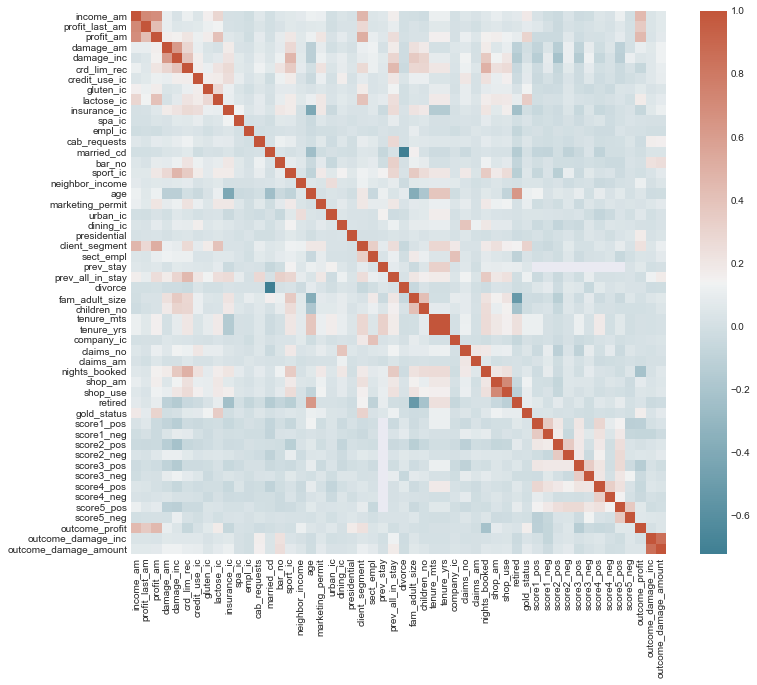

In [12]:
plt.figure(figsize=(12,10))
cor = data_train.corr()
sns.heatmap(cor, annot=False, cmap=sns.diverging_palette(220, 20, as_cmap=True)
)
plt.show()

### Checking the variables we are trying to predict and dropping them from training set

I am creating and auxiliary dataframe, that will contain variables we were trying to predict.

In [14]:
predicted_features = ['outcome_profit', 'outcome_damage_inc', 'outcome_damage_amount']

print(data_train.columns)
data_feat = data_train.drop(predicted_features , axis=1)
print(data_feat.shape)

Index(['income_am', 'profit_last_am', 'profit_am', 'damage_am', 'damage_inc',
       'crd_lim_rec', 'credit_use_ic', 'gluten_ic', 'lactose_ic',
       'insurance_ic', 'spa_ic', 'empl_ic', 'cab_requests', 'married_cd',
       'bar_no', 'sport_ic', 'neighbor_income', 'age', 'marketing_permit',
       'urban_ic', 'dining_ic', 'presidential', 'client_segment', 'sect_empl',
       'prev_stay', 'prev_all_in_stay', 'divorce', 'fam_adult_size',
       'children_no', 'tenure_mts', 'tenure_yrs', 'company_ic', 'claims_no',
       'claims_am', 'nights_booked', 'gender', 'shop_am', 'shop_use',
       'retired', 'gold_status', 'score1_pos', 'score1_neg', 'score2_pos',
       'score2_neg', 'score3_pos', 'score3_neg', 'score4_pos', 'score4_neg',
       'score5_pos', 'score5_neg', 'outcome_profit', 'outcome_damage_inc',
       'outcome_damage_amount'],
      dtype='object')
(4947, 50)


In [16]:

data_target  = data_train[predicted_features].copy()
data_target["abs_value"] = data_target['outcome_profit'].sub(data_target['outcome_damage_amount'], fill_value=np.NAN)


client_labels = ["very bad","bad" ,"average", "good","very good"]
data_target["client_classes"] = pd.qcut(data_target["abs_value"], 5, labels = client_labels )
data_target['client_class'] = data_target['client_classes'].apply(lambda x:'Good' if x=='good' or x=="very good" else 'Bad').astype('category')

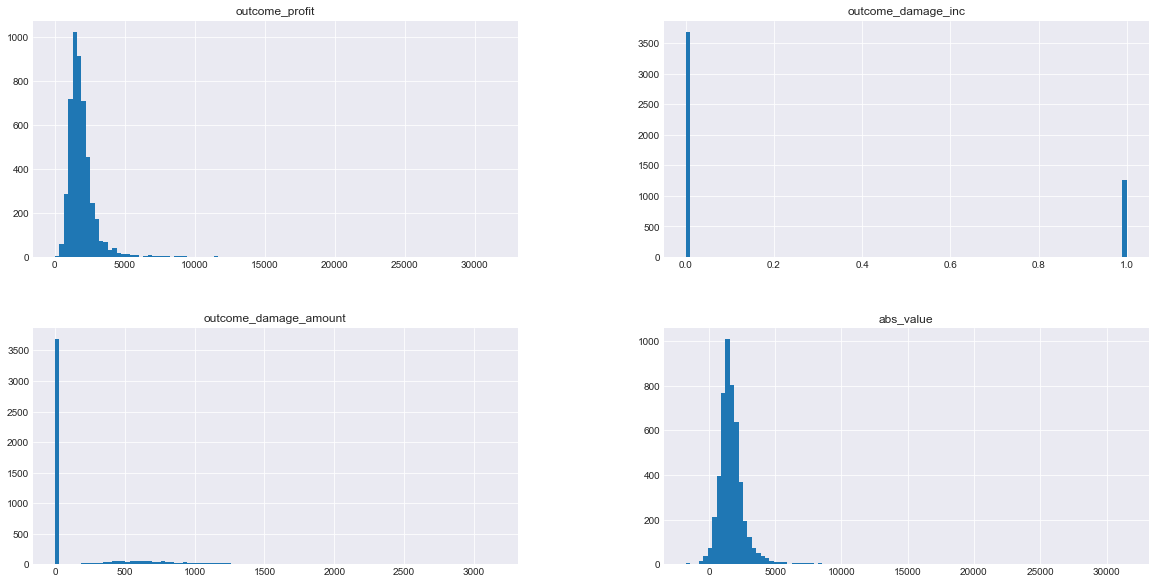

In [17]:
plt.rcParams["figure.figsize"] = (20,10)

_ = data_target.hist(bins = 100)

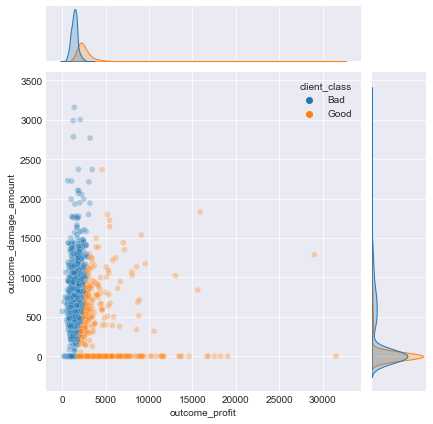

In [18]:
plot =  sns.jointplot(
    data=data_target,
    x='outcome_profit',y= 'outcome_damage_amount',alpha=0.3, hue = 'client_class', 
    
)

plt.show()


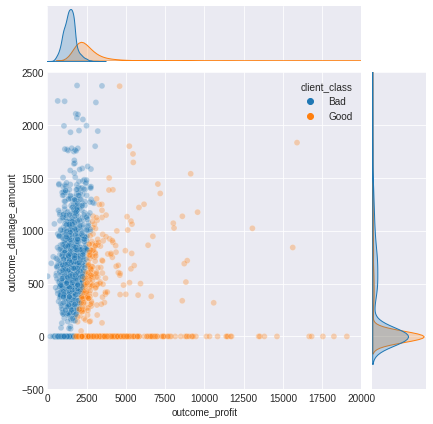

In [30]:
plot =  sns.jointplot(
    data=data_target,
    x='outcome_profit',y= 'outcome_damage_amount',alpha=0.3, hue = 'client_class', 
    
)
plot.ax_marg_x.set_xlim(0,  20000)
plot.ax_marg_y.set_ylim(-500, 2500)
plot.ax_joint.plot([0,0], [2500,2500], 'b-', linewidth = 2)
plt.show()

### Preprocessing part

After this, the preprocessing will actually start. But first, it is important to understand that what is done in the training data set, has to also be done also in the score data set. For this, both data set will be fused, but the outcomes need to be dropped.

In [19]:
data_feat_shape = data_feat.shape
score_shape = score.shape
print(score.shape)
print(data_feat.shape)

datafull = pd.concat([data_feat, score])


(496, 50)
(4947, 50)


Then categorical features were chosen. In the next part, the different values of each of them are counted. 

In [20]:
print(datafull['client_segment'].value_counts())
print(datafull['sect_empl'].value_counts())
print(datafull['gender'].value_counts())
print(datafull['retired'].value_counts())
print(datafull['gold_status'].value_counts())
print(datafull['prev_stay'].value_counts())
print(datafull['divorce'].value_counts())
print(datafull['married_cd'].value_counts())

1.0    3712
2.0     925
0.0     352
3.0     329
4.0      87
5.0      38
Name: client_segment, dtype: int64
0.0    4820
1.0     468
6.0      78
2.0      45
4.0      29
3.0       3
Name: sect_empl, dtype: int64
M    2734
V    2709
Name: gender, dtype: int64
0.0    4456
1.0     987
Name: retired, dtype: int64
0.0    5241
1.0     202
Name: gold_status, dtype: int64
1.0    4848
0.0     595
Name: prev_stay, dtype: int64
0.0    4884
1.0     559
Name: divorce, dtype: int64
True     4460
False     983
Name: married_cd, dtype: int64


For the variables, a mode imputation was done instead of making a separate missing category. A disadvantage is that the most frequent value will be favored. But every technique, has its downfalls.

In [21]:
# datafull['client_segment'] = pd.Categorical(datafull['client_segment'])
# datafull['sect_empl'] = pd.Categorical(datafull['sect_empl'])
# datafull['retired'] = pd.Categorical(datafull['retired'])
# datafull['gold_status'] = pd.Categorical(datafull['gold_status'])
# datafull['prev_stay'] = pd.Categorical(datafull['prev_stay'])
# datafull['divorce'] = pd.Categorical(datafull['divorce'])
categorical_columns = ['client_segment', "credit_use_ic", "gluten_ic", "lactose_ic","insurance_ic","marketing_permit", "presidential", "urban_ic", "prev_all_in_stay", "shop_use", 
             "company_ic", "dining_ic", "spa_ic","sport_ic","empl_ic",'sect_empl', "retired", "gold_status", "prev_stay", 'divorce', "gender"]
impute_mode = SimpleImputer (strategy='most_frequent')
for cols in categorical_columns:  
      datafull[cols] = impute_mode.fit_transform(datafull[[cols]])

The categorical features that had values different from 0 and 1, were dummified (separated in categories) 

In [22]:
datafull['client_segment'] = pd.Categorical(datafull['client_segment'])
datafull['sect_empl'] = pd.Categorical(datafull['sect_empl'])
# The NaN categorie won't be necessary anymore, thanks to the mode imputing.
pd.get_dummies(datafull[['client_segment', 'sect_empl']], dummy_na=False).head()
print(datafull.shape)
datafull2 = pd.concat([datafull,pd.get_dummies(datafull[['gender','client_segment', 'sect_empl']], dummy_na=False)], axis=1)
print(datafull2.shape)
print(datafull2.head(1000))     

(5443, 50)
(5443, 64)
     income_am  profit_last_am  profit_am  damage_am  damage_inc  crd_lim_rec  \
0        227.0             0.0     3201.0      888.0         6.0      15000.0   
1        268.0            16.0     1682.0        0.0         0.0        750.0   
2        283.0            23.0     1673.0        0.0         0.0        750.0   
3        227.0             0.0     1685.0        0.0         0.0          0.0   
4       4091.0          1028.0     3425.0      785.0         2.0      14000.0   
..         ...             ...        ...        ...         ...          ...   
995     1543.0            46.0     1964.0        0.0         0.0          0.0   
996      847.0           260.0     1724.0        0.0         0.0          0.0   
997      227.0             0.0     1659.0        0.0         0.0       3500.0   
998      227.0             0.0     1620.0        0.0         0.0          0.0   
999      227.0             0.0     1620.0        0.0         0.0          0.0   

     

After creating the dummies for the necessary variables, the original features and 1 dummy category was dropped in each of them. Also a new  feature, "profit per night" was created.

In [23]:
datafull2.drop(['client_segment', 'sect_empl', 'gender', 'client_segment_5.0','sect_empl_6.0','gender_V'], axis=1, inplace=True)
datafull2.shape

datafull2['profitpernight'] = datafull2['profit_am'] / datafull2['nights_booked']

Now the data with over 25% missing values will be found. Most of it consist in the features related to scores. The solution dropped them, but we decided to try another option.

In [24]:
(datafull2.isnull().mean())[datafull2.isnull().mean() > 0.25]

score1_pos    0.752526
score1_neg    0.733970
score2_pos    0.757487
score2_neg    0.737645
score3_pos    0.743340
score3_neg    0.722212
score4_pos    0.753445
score4_neg    0.733603
score5_pos    0.749403
score5_neg    0.697410
dtype: float64

Something important that was mentioned during class was that sometimes it is not worthy to use very complex methods like soft imputing to avoid dropping features with missing values. So we decided to try something simple: a mean imputing. The scores are quantitative, and of course, a downside of this is that it could bring us distortion.

In [25]:
impute_quant = SimpleImputer (strategy='mean')
for cols in ['score1_pos', 'score1_neg', 'score2_pos', 'score2_neg', 'score3_pos',
       'score3_neg', 'score4_pos', 'score4_neg', 'score5_pos', 'score5_neg']:  # Missing data, Scores are quantitative
      datafull2[cols] = impute_quant.fit_transform(datafull2[[cols]])

After this, a mean imputation was done for the other missing values that could be present (here the binary data was already treated before). And at the end there was no more missing data.

In [26]:
print(datafull2.isnull().sum().sum())
datafull2.fillna(datafull2.mean(), inplace=True)
print(datafull2.isnull().sum().sum())

987
0


In [27]:
def return_categorical(datafull):
  df = datafull.copy()
  x = df.nunique()
  
  df_categorical = df[list(x[x<=2].index)].copy()
  categorical_features =list(df_categorical.columns.values)
  datafull[categorical_features] = datafull[categorical_features].astype('int')
  return categorical_features, datafull

categorical_features, datafull2 = return_categorical(datafull2)

In [28]:
datafull2.isnull().sum()
datafull2

,income_am,profit_last_am,profit_am,damage_am,damage_inc,crd_lim_rec,credit_use_ic,gluten_ic,lactose_ic,insurance_ic,...,client_segment_1.0,client_segment_2.0,client_segment_3.0,client_segment_4.0,sect_empl_0.0,sect_empl_1.0,sect_empl_2.0,sect_empl_3.0,sect_empl_4.0,profitpernight
0,227.0,0.0,3201.0,888.0,6.0,15000.0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,15.315789
1,268.0,16.0,1682.0,0.0,0.0,750.0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,420.500000
2,283.0,23.0,1673.0,0.0,0.0,750.0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,278.833333
3,227.0,0.0,1685.0,0.0,0.0,0.0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,421.250000
4,4091.0,1028.0,3425.0,785.0,2.0,14000.0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,1141.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,820.0,216.0,7794.0,1103.0,3.0,9000.0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,199.846154
492,6092.0,2100.0,3137.0,0.0,0.0,0.0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1568.500000
493,2301.0,214.0,2516.0,0.0,0.0,11000.0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,148.000000
494,492.0,0.0,3716.0,713.0,2.0,5000.0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,82.577778


### Scalling the dataset
**In** the next section, the features will be rescaled. I need to avoid scalling binary variables, Also I need to convert them to int.

In [29]:
numerical_features = list(set(datafull2.columns) -  set(categorical_features))

datafull3 = datafull2.copy()
scaler = StandardScaler()
data = []
for cols in numerical_features:  
      datafull3[cols] = scaler.fit_transform(datafull2[[cols]])

Then, the score and the train datasets will be separated and the outcome features will be reinstated.

### Returning to the previous shape




In [127]:

print(data_feat_shape[0] + score_shape[0])
print(data_feat_shape[0])


4947
5443


In [31]:
def return_orginal_shape(df):
  data_train = df[0:data_feat_shape[0]]
  score = df[data_feat_shape[0]:data_feat_shape[0] + score_shape[0]]
  return data_train, score

data_train, score = return_orginal_shape(datafull3)
data_train = pd.concat([data_target[['outcome_profit', 'outcome_damage_inc', 'outcome_damage_amount']],data_train], axis=1)

### Feature importance regression

In [32]:
data_target['outcome_profit'].values
from sklearn import feature_selection
from scipy import stats
from collections import defaultdict

def feature_importance_regression(features, target, n_neighbors=4, random_state=None):

    cont = features.select_dtypes(include=[np.floating])
    disc = features.select_dtypes(include=[np.integer, np.bool])

    cont_imp = pd.DataFrame(index=cont.columns)
    disc_imp = pd.DataFrame(index=disc.columns)

    # Continuous features
    if cont_imp.index.size > 0:

        # Pearson correlation
        pearson = np.array([stats.pearsonr(feature, target) for _, feature in cont.iteritems()])
        cont_imp['pearson_r'] = pearson[:, 0]
        cont_imp['pearson_r_p_value'] = pearson[:, 1]

        # Mutual information
        mut_inf = feature_selection.mutual_info_regression(cont, target, discrete_features=False,
                                                           n_neighbors=n_neighbors,
                                                           random_state=random_state)
        cont_imp['mutual_information'] = mut_inf

    # Discrete features
    if disc_imp.index.size > 0:

        # F-test
        f_tests = defaultdict(dict)

        for feature in disc.columns:
            groups = [target[idxs] for idxs in disc.groupby(feature).groups.values()]
            statistic, p_value = stats.f_oneway(*groups)
            f_tests[feature]['f_statistic'] = statistic
            f_tests[feature]['f_p_value'] = p_value

        f_tests_df = pd.DataFrame.from_dict(f_tests, orient='index')
        disc_imp['f_statistic'] = f_tests_df['f_statistic']
        disc_imp['f_p_value'] = f_tests_df['f_p_value']

        # Mutual information
        mut_inf = feature_selection.mutual_info_regression(disc, target, discrete_features=True,
                                                           n_neighbors=n_neighbors,
                                                           random_state=random_state)
        disc_imp['mutual_information'] = mut_inf

    return cont_imp, disc_imp 

#### Outcome profit

In [33]:
data_preproc, score_preproc = return_orginal_shape(datafull2)


In [191]:
for count, item in enumerate(data_target):
  cont_imp, disc_imp = feature_importance_regression(data_preproc, data_target[item].values, n_neighbors=3, random_state=None)
  display(item)
  display(cont_imp.sort_values(by=['pearson_r'], ascending = False).round(3))
  display(disc_imp.sort_values(by=['f_statistic'], ascending = False).round(3))

'outcome_profit'

,pearson_r,pearson_r_p_value,mutual_information
profitpernight,0.868,0.000,0.349
profit_am,0.453,0.000,0.041
income_am,0.447,0.000,0.023
profit_last_am,0.357,0.000,0.014
neighbor_income,0.114,0.000,0.017
damage_am,0.102,0.000,0.011
shop_am,0.085,0.000,0.006
age,0.045,0.002,0.012
damage_inc,0.043,0.002,0.003
score2_neg,0.030,0.034,0.000


,f_statistic,f_p_value,mutual_information
lactose_ic,161.486,0.000,0.004
presidential,160.434,0.000,0.012
client_segment_3.0,158.000,0.000,0.009
gold_status,128.982,0.000,0.011
client_segment_1.0,109.388,0.000,0.005
gender_M,41.074,0.000,0.028
gluten_ic,23.976,0.000,0.002
insurance_ic,22.145,0.000,0.000
prev_stay,18.197,0.000,0.001
urban_ic,15.930,0.000,0.005


'outcome_damage_inc'

,pearson_r,pearson_r_p_value,mutual_information
bar_no,0.232,0.000,0.044
cab_requests,0.165,0.000,0.022
damage_am,0.059,0.000,0.000
damage_inc,0.056,0.000,0.011
crd_lim_rec,0.052,0.000,0.004
fam_adult_size,0.043,0.002,0.010
profit_last_am,0.036,0.012,0.009
income_am,0.033,0.020,0.001
profit_am,0.031,0.032,0.000
shop_am,0.030,0.033,0.000


,f_statistic,f_p_value,mutual_information
prev_all_in_stay,84.220,0.000,0.003
gender_M,60.138,0.000,0.006
insurance_ic,20.984,0.000,0.004
credit_use_ic,15.303,0.000,0.000
lactose_ic,12.646,0.000,0.000
client_segment_4.0,11.666,0.001,0.000
sect_empl_2.0,10.839,0.001,0.002
marketing_permit,10.324,0.001,0.000
retired,6.593,0.010,0.000
married_cd,6.305,0.012,0.005


'outcome_damage_amount'

,pearson_r,pearson_r_p_value,mutual_information
bar_no,0.250,0.000,0.025
cab_requests,0.157,0.000,0.015
damage_inc,0.128,0.000,0.022
damage_am,0.126,0.000,0.011
crd_lim_rec,0.105,0.000,0.005
profit_am,0.074,0.000,0.018
income_am,0.069,0.000,0.009
profit_last_am,0.065,0.000,0.006
fam_adult_size,0.064,0.000,0.016
nights_booked,0.054,0.000,0.002


,f_statistic,f_p_value,mutual_information
prev_all_in_stay,158.338,0.000,0.010
insurance_ic,65.403,0.000,0.018
gender_M,43.410,0.000,0.000
credit_use_ic,42.422,0.000,0.003
client_segment_4.0,39.675,0.000,0.005
lactose_ic,34.404,0.000,0.005
marketing_permit,30.423,0.000,0.002
sport_ic,26.354,0.000,0.008
gold_status,25.801,0.000,0.009
client_segment_1.0,15.875,0.000,0.001


'abs_value'

,pearson_r,pearson_r_p_value,mutual_information
profitpernight,0.841,0.000,0.300
profit_am,0.422,0.000,0.038
income_am,0.418,0.000,0.043
profit_last_am,0.331,0.000,0.009
neighbor_income,0.100,0.000,0.011
shop_am,0.070,0.000,0.003
damage_am,0.065,0.000,0.004
age,0.050,0.000,0.006
score5_pos,0.027,0.053,0.000
score5_neg,0.020,0.166,0.009


,f_statistic,f_p_value,mutual_information
client_segment_3.0,141.172,0.000,0.008
presidential,137.131,0.000,0.011
lactose_ic,115.599,0.000,0.007
gold_status,93.426,0.000,0.009
client_segment_1.0,82.765,0.000,0.018
insurance_ic,45.780,0.000,0.008
gender_M,20.016,0.000,0.000
prev_all_in_stay,17.457,0.000,0.017
gluten_ic,16.341,0.000,0.000
prev_stay,15.884,0.000,0.000


UFuncTypeError: ignored

 #### Simple  model of logistic regression
 I will do a really simple model to have a baseline to our prediction a a general pipeline, To do it I will peak a variables that heave pearson correlations or 

In [ ]:
  cont_imp, disc_imp = feature_importance_regression(data_preproc, data_target[item].values, n_neighbors=3, random_state=None)
  display(item)
  display(cont_imp.sort_values(by=['pearson_r'], ascending = False).round(3))
  display(disc_imp.sort_values(by=['f_statistic'], ascending = False).round(3))

# 2. Profit Model

### Splitting the data into test set

After the preprocessing, the data was split in train and test. The test size was decided to be 20%, so that more data was available for the training.

In [199]:
X_train, X_test, y_train, y_test = train_test_split(data_train.drop(['outcome_profit', 'outcome_damage_inc', 'outcome_damage_amount'],1),
                                                    data_train['outcome_profit'], test_size=0.2, random_state=48)

The model for profit will try 500 random hyperparameter combinations, each time using 5 Cross Validation folds, totalling 2500 fits. It takes a while to run (around 40 minutes).

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 50)]
learning_rate = [x for x in np.logspace(start = -3, stop = -0.01, num = 50)]
max_features = ['auto']
max_depth = [int(x) for x in np.linspace(1, 10, num = 10)]
min_samples_split = [2, 5, 10, 30]
min_samples_leaf = [1, 2, 4, 10, 30]
subsample = [0.4, 0.6, 0.8, 1]
random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'subsample': subsample}
gbm = GradientBoostingRegressor()
gbm_random = RandomizedSearchCV(estimator = gbm, param_distributions = random_grid, n_iter = 500, cv = 5, verbose=2, random_state=42, n_jobs = -1)
gbm_random.fit(X_train, y_train)
gbm_random.best_params_

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 22.3min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 48.4min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 81.6min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed: 128.1min


In the next section the model is pickled. The reason is to not let all that time that the model took to run, to get wasted. It is a way to persist it.

In [ ]:
score.to_pickle(data_output_path / "score_v3.pkl")
data_train.to_pickle(data_output_path / "data_train_v3.pkl")
joblib.dump(gbm_random, 'random_search_gbm.pkl')

Then the output is examined.

In [ ]:
pd.DataFrame(gbm_random.cv_results_).head()

After this, the best hyperparameter combination is inspected. 

In [ ]:
pd.DataFrame(gbm_random.cv_results_).loc[pd.DataFrame(gbm_random.cv_results_)['mean_test_score'].idxmax()]

Finally, the best parameters are used to fit the model

In [ ]:
params = gbm_random.best_params_
gbm_profit = GradientBoostingRegressor(**params)
gbm_profit.fit(X_train, y_train)
# I got R2: 0.975 for the X_train and R2: 0.829 for the X_test
print('R2: %.3f' % gbm_profit.score(X_train, np.array(y_train).reshape(-1,1)))
print('R2: %.3f' % gbm_profit.score(X_test, np.array(y_test).reshape(-1,1))) #Here we are using the "holdout" set already

And in the last point, the potential clients are scored with the model, and this is saved.

In [ ]:
profit_preds = gbm_profit.predict(score)


In [ ]:
np.save(data_output_path / "profit_preds_v3.pkl", profit_preds)


Then a way to "whitebox" the model was tried. For it, the variables that mattered were identified using Variable importances based on impurity reduction.


In [ ]:
gbm_profit.feature_importances_.sum()
d = {'feature':X_train.columns, 'importance':gbm_profit.feature_importances_}
importances = pd.DataFrame(data=d)
importances.sort_values('importance', ascending=False,inplace=True)

plt.rcdefaults()
plt.rcParams['figure.figsize'] = (4, 3)
fig, ax = plt.subplots()
variables = importances.feature
y_pos = np.arange(len(variables))
scaled_importance = importances.importance
ax.barh(y_pos, scaled_importance, align='center', color='deepskyblue', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(variables)
ax.invert_yaxis()
ax.set_xlabel('Scaled Importance')
ax.set_title('Variable Importance')
plt.show()


This graphic is unorganized. All the variables are shown in the y axis, it is difficult to read them. So it were orgaized in the next section.

In [ ]:
importances2 = importances.copy()
importances2 = importances2.head(20)
import matplotlib.pyplot as plt
plt.rcdefaults()
plt.rcParams['figure.figsize'] = (4, 3)
fig, ax = plt.subplots()
variables = importances2.feature
y_pos = np.arange(len(variables))
scaled_importance = importances2.importance
ax.barh(y_pos, scaled_importance, align='center', color='deepskyblue', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(variables)
ax.invert_yaxis()
ax.set_xlabel('Scaled Importance')
ax.set_title('Variable Importance')
plt.show()
# And now we have a nice plot

After this, Permutation importance was used. As it can be seen, Feature importance and Permutation importance identify the same strongly predictive features for the model for Profit: Profit per night, Mean taxable income of neighborhood, Presidential suit previous use, and the amount spent in shop, but in different order (for permutation the Presidential suit use and the amount spent on shop come higher than the neighborhood income).

In [ ]:
imp = permutation_importance(gbm_profit, X_train, y_train,n_repeats=10,
                                random_state=42, n_jobs=2)



sorted_idx = imp.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(imp.importances[sorted_idx][48:59].T, vert=False, labels=X_train.columns[sorted_idx][48:59])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()

#  Prediction of damage (binary)

## GradientBoostingClassifier

We check the amount of different cases in different groups

In [192]:
data_train.outcome_damage_inc.value_counts()

0    3682
1    1265
Name: outcome_damage_inc, dtype: int64

In [195]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_train.drop(['outcome_profit', 'outcome_damage_inc', 'outcome_damage_amount'],1), 
                                                    data_train['outcome_damage_inc'], test_size=0.2, random_state=48)
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 50)]
learning_rate = [x for x in np.logspace(start = -3, stop = -0.01, num = 50)]
max_features = ['auto']
max_depth = [int(x) for x in np.linspace(1, 10, num = 10)]
min_samples_split = [2, 5, 10, 30]
min_samples_leaf = [1, 2, 4, 10, 30]
subsample = [0.4, 0.6, 0.8, 1]
random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'subsample': subsample}
gbm = GradientBoostingClassifier()
gbm_random = RandomizedSearchCV(estimator = gbm, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=4872, n_jobs = -1)
gbm_random.fit(X_train, y_train)
gbm_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 14.6min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 27.0min finished


{'learning_rate': 0.012542015897895777,
 'max_depth': 2,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 30,
 'n_estimators': 504,
 'subsample': 0.4}

In [197]:
params = gbm_random.best_params_
gbm_damagebin = GradientBoostingClassifier(**params)
gbm_damagebin.fit(X_train, y_train)
print('Train accuracy: %.3f' % gbm_damagebin.score(X_train, y_train))
print('Test accuracy: %.3f' % gbm_damagebin.score(X_test, y_test))

Train accuracy: 0.773
Test accuracy: 0.739


## Option 2: Hist gradient boosting classifier
Now let's see if we have better results using the Histogram Gradiënt Boosting Classifier.

In [ ]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_train.drop(['outcome_profit', 'outcome_damage_inc', 'outcome_damage_amount'],1), 
                                                    data_train['outcome_damage_inc'], test_size=0.2, random_state=9876)
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
learning_rate = [x for x in np.logspace(start = -3, stop = -0.01, num = 50)]
max_depth = [int(x) for x in np.linspace(1, 10, num = 10)]
min_samples_leaf = [1, 2, 4, 10, 30]
random_grid = {'learning_rate': learning_rate,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf}
hgbm = HistGradientBoostingClassifier()
hgbm_random = RandomizedSearchCV(estimator = hgbm, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=4872, n_jobs = -1)
hgbm_random.fit(X_train, y_train)
hgbm_random.best_params_

In [ ]:
params = hgbm_random.best_params_
hgbm_damagebin = GradientBoostingClassifier(**params)
hgbm_damagebin.fit(X_train, y_train)
print('Train accuracy: %.3f' % hgbm_damagebin.score(X_train, y_train))
print('Test accuracy: %.3f' % hgbm_damagebin.score(X_test, y_test))

In [ ]:
damagebin_preds = hgbm_damagebin.predict_proba(score)
np.save(data_output_path / "damagebin_preds_v3.pkl", damagebin_preds)


# Prediction the damage (amount)

In [ ]:
profit_preds = np.load(path)
pred_all = pd.Series(profit_preds - [x[1] for x in damagebin_preds] * damageam_preds)
pred_allexp_profit = pd.Series(profit_preds - [x[1] for x in damagebin_preds] * damageam_preds)
exp_profit.index = score.index
score['exp_profit'] = exp_profit

In [ ]:
pred_all.hist()

exp_profit = pd.Series(profit_preds - [x[1] for x in damagebin_preds] * damageam_preds)
exp_profit.index = score.index
score['exp_profit'] = exp_profit